In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [11]:
#Load the data set
#clmsex=x1---loss=x5
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [12]:
# dropping the case number columns as it is not required
#if inplace is not used we hv to store data in other variable i.e modified 
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [13]:
#Shape of the data set
claimants.shape

(1340, 6)

In [14]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [15]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:] #remaing col
Y = claimants.iloc[:,0] #1st col

In [16]:
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [17]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [18]:
classifier.intercept_ #alpha

array([-0.17361679])

In [19]:
classifier.coef_ #b1 b2 b3 b4 b5

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [20]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [21]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [22]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [23]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [24]:
ac(Y,y_pred) #y accuracy

0.708029197080292

In [25]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [26]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [27]:
# ROC Curve for cutoff free

Text(0, 0.5, 'True Positive Rate')

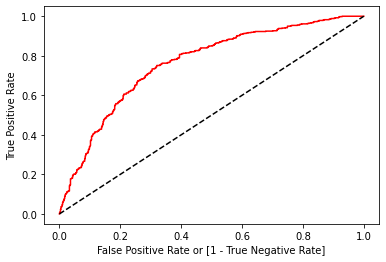

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#tpr=tp/tp+fn fpr=fp/fp+tn
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [29]:
auc

0.7108589063606365

In [30]:
print(tpr,fpr,thresholds)

[0.         0.0019305  0.003861   0.003861   0.00965251 0.00965251
 0.02316602 0.02316602 0.03667954 0.03667954 0.04633205 0.04633205
 0.05791506 0.05791506 0.06370656 0.06370656 0.06949807 0.06949807
 0.07722008 0.07722008 0.08880309 0.08880309 0.0984556  0.0984556
 0.1023166  0.1023166  0.1042471  0.1042471  0.11196911 0.11196911
 0.11389961 0.11389961 0.11583012 0.11583012 0.12741313 0.13127413
 0.14285714 0.14285714 0.14671815 0.14671815 0.17760618 0.17760618
 0.17953668 0.17953668 0.18146718 0.18146718 0.19305019 0.19305019
 0.1988417  0.1988417  0.2007722  0.2007722  0.2007722  0.2027027
 0.2027027  0.20849421 0.20849421 0.21042471 0.21042471 0.22393822
 0.22393822 0.22586873 0.22586873 0.22779923 0.22779923 0.23166023
 0.23166023 0.23359073 0.23359073 0.23745174 0.23745174 0.24517375
 0.24517375 0.25482625 0.25482625 0.25868726 0.25868726 0.26447876
 0.26447876 0.26640927 0.26640927 0.27992278 0.27992278 0.29343629
 0.29343629 0.3030888  0.3030888  0.30501931 0.30501931 0.306949

In [31]:
print(thresholds) #automatically

[1.79054593e+00 7.90545935e-01 7.87863385e-01 7.80438455e-01
 7.77395844e-01 7.76462373e-01 7.62275971e-01 7.61429713e-01
 7.53158678e-01 7.51243537e-01 7.48992067e-01 7.47934566e-01
 7.43891339e-01 7.43489999e-01 7.39028665e-01 7.38313952e-01
 7.35520206e-01 7.34774649e-01 7.33204355e-01 7.32598687e-01
 7.28818243e-01 7.28598763e-01 7.24064656e-01 7.23091737e-01
 7.21417349e-01 7.20951087e-01 7.20791088e-01 7.20610901e-01
 7.18246894e-01 7.17902002e-01 7.17597383e-01 7.17060100e-01
 7.16867628e-01 7.15302513e-01 7.12082039e-01 7.11943596e-01
 7.10388317e-01 7.09792061e-01 7.08524027e-01 7.07806569e-01
 7.03971943e-01 7.03570516e-01 7.03325374e-01 7.03012024e-01
 7.02442673e-01 7.01803943e-01 7.00108315e-01 7.00037432e-01
 6.99357008e-01 6.99300941e-01 6.98492330e-01 6.98009381e-01
 6.97704110e-01 6.97361014e-01 6.97356794e-01 6.97233981e-01
 6.96379943e-01 6.95849033e-01 6.95700474e-01 6.93851273e-01
 6.92553693e-01 6.92474711e-01 6.91979269e-01 6.91806917e-01
 6.91483385e-01 6.909870

In [32]:
#multiple classes

In [33]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac

In [34]:
data=sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [36]:
x=data.iloc[:,:4]
y=data.iloc[:,4]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)#30% data fr testing remaing for trainhing

In [38]:
x_train.shape

(105, 4)

In [39]:
y_train.shape

(105,)

In [40]:
#logistic regression & fit model
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_train_pred=classifier.predict(x_train)

In [42]:
ac(y_train,y_train_pred)

0.9619047619047619

In [43]:
y_test_pred=classifier.predict(x_test)

In [44]:
ac(y_test,y_test_pred)

1.0

In [45]:
classifier.intercept_

array([  8.64680626,   1.61034579, -10.25715205])

In [46]:
classifier.coef_

array([[-0.32363095,  0.86722887, -2.31382154, -0.92464913],
       [ 0.39726375, -0.12486548, -0.07687074, -0.88172838],
       [-0.0736328 , -0.74236339,  2.39069227,  1.80637751]])

In [47]:
set(y_train) #numerous intercept and coef due to 3 models

{'setosa', 'versicolor', 'virginica'}